In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
dia = csv.excel()
df = pd.read_csv("regLin4.csv")

In [13]:
 X_train, X_test, Y_train, Y_test = train_test_split(df[['X']],df[['y']], train_size=0.75)

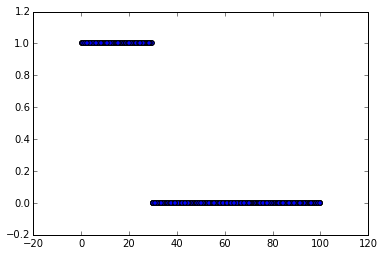

In [15]:
plt.scatter(X_train,Y_train)

In [17]:
def salida(w,X):
    res= np.sum(np.asarray(w[1:])*np.asarray(X)) +w[0]
    if res >=0:
        return 1
    else:
        return 0
def entrena(X,y,w,la=0.0):
    eta=0.01
    for i in range(len(X)):
        error=y[i]-salida(w,X[i])
        w[0]=w[0]+eta*(error)-la*w[0]
        for j in range(len(w)-1):
            w[j+1]=w[j+1]+eta*(error*X[i][j])-la*w[j+1]
    return w

In [91]:
linReg=LinearRegression()
linReg.fit(X_train,Y_train)
w0 = [linReg.intercept_[0],linReg.coef_[0]]
w = entrena(X_train.values,Y_train.values,w0)
w

[array([ 1.76962052]), array([-0.07838968])]

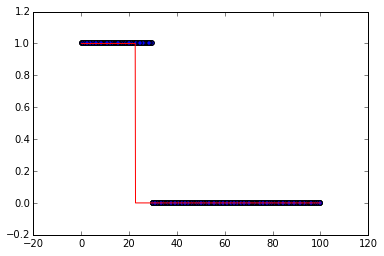

In [101]:
plt.scatter(X_train,Y_train)
x=np.linspace(min(X_train.values),max(X_train.values),len(X_train))
y = range(len(x))
for i in range(len(x)):
    y[i] = salida(w,x[i])
plt.plot(x,y,color='red')

In [117]:
Y_results = range(len(X_test))
Accuracy = range(len(X_test))
for i in range(len(X_test)):
    Y_results[i] = salida(w,X_test.values[i])
for i in range(len(Y_test)):
    if Y_results[i] == Y_test.values[i]:
        Accuracy[i] = 1
    else:
        Accuracy[i] = 0
Success = 0        
for i in range(len(Accuracy)):
    Success = Success + Accuracy[i]
SuccessRate = (Success/(len(Accuracy)))*100


0